<a href="https://colab.research.google.com/gist/david4096/8aff9cec05af0d8ebe6c47dfffe4e34a/networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NetworkX test graph visualization

A test investigation of a Knowledge Graph of keyword and author entities linked by “creator” (creat) and “keyword” (key) relationships for a small subset of the hugging face dataset.
Produces a graph visualization and an adjacency matrix of relationships in the Knowledge Graph.

In [1]:
!pip install rdflib
!pip install networkx
!pip install numpy
!pip install matplotlib
!pip install croissant-rdf

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 100.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 120.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 75.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --------------------

In [2]:
import rdflib
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

__author__ = "James Wilsenach"

In [7]:
!huggingface-rdf

^C



Parsing data ----------------------------------------   0% -:--:--
Parsing data ----------------------------------------   0% -:--:--
Parsing data ----------------------------------------   0% -:--:--


[2025-04-22 11:03:35,868] INFO: Searching 10 datasets metadata.
[2025-04-22 11:05:00,091] ERROR: Error fetching datasets: (MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /api/datasets?limit=10 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001E4DB895A00>, 'Connection to huggingface.co timed out. (connect timeout=None)'))"), '(Request ID: 23911d2f-ba6d-40c9-8609-65925ed72c95)')
[2025-04-22 11:05:00,091] INFO: Retrieved Croissant metadata JSON-LD for 0 datasets in 84.22s
[2025-04-22 11:05:00,091] INFO: Loading Croissant metadata JSON-LD to RDF graph. Total items: 0, Chunk size: 1
[2025-04-22 11:05:00,101] INFO: Parsing completed in 0.01s, writing 0 RDF triples to file croissant_metadata.ttl
[2025-04-22 11:05:00,103] INFO: Serialization completed in 0.00s


In [8]:
# Load RDF Graph
g = rdflib.Graph()
g.parse("croissant_metadata.ttl", format="turtle")  # Replace with your Turtle file

<Graph identifier=N64a14c1ea849491f91d83a39e9d4eea9 (<class 'rdflib.graph.Graph'>)>

In [9]:
# Map predicates to unique integer values
predicate_map = {p: i for i, p in enumerate(set(g.predicates()))}


inverse_predicate_map = {v: k for k, v in predicate_map.items()}
creatorid = [predicate_map[k] for k in predicate_map if k if 'creator' in str(k)][0]
nameid = [predicate_map[k] for k in predicate_map if k if 'name' in str(k)][0]
keywordid = [predicate_map[k] for k in predicate_map if k if 'keyword' in str(k)][0]
print(creatorid)

28


In [6]:
inverse_predicate_map

{}

In [10]:
# Create a directed graph
G = nx.DiGraph()
creators = {}

creatornames = {}
# Add edges with integer labels
for subj, pred, obj in g:
    if predicate_map[pred] == nameid:
        creatornames[subj] = obj

# Add edges with integer labels
for subj, pred, obj in g:
    if predicate_map[pred] in [creatorid]:
        # print(predicate_map[pred])
        G.add_edge(str(creatornames[subj]), str(creatornames[obj]), label='creat')
        # print(pred)
    elif predicate_map[pred] in [keywordid]:
        G.add_edge(str(creatornames[subj]), str(obj), label='key')

In [11]:
# Convert to an undirected simple graph (ignoring multiple edges and directions)
G_simple = nx.Graph(G)

# Check if the simple graph is connected
is_connected =  nx.is_connected(G_simple)
print("The induced simple graph is connected. Proceeding with visualization.")

The induced simple graph is connected. Proceeding with visualization.


c:\Users\s040i\AppData\Local\miniconda3\envs\croiml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\s040i\AppData\Local\miniconda3\envs\croiml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


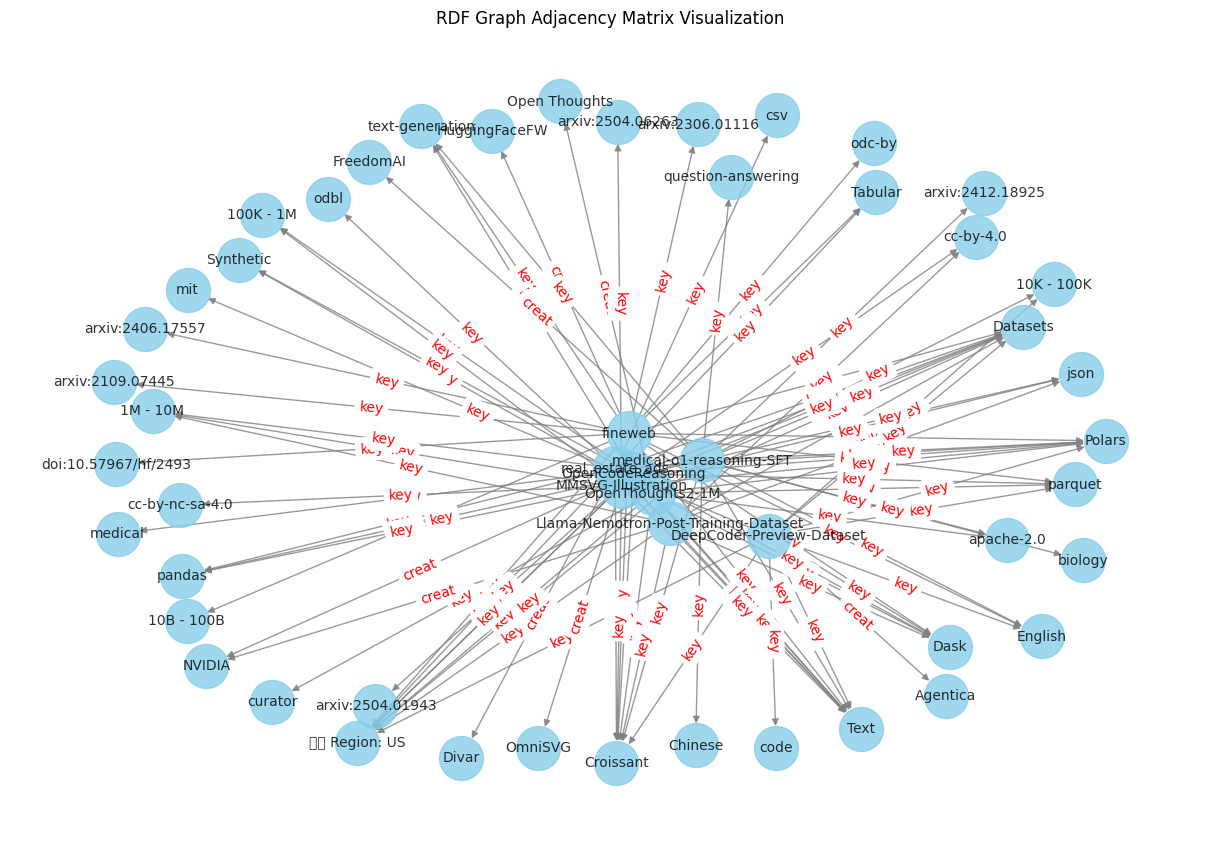

In [12]:
# Layout for visualization
pos = nx.spring_layout(G)

plt.figure(figsize=(12, 8))

# Draw nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000,
        font_size=10, font_color='black', edge_color='gray', width=1, alpha=0.8)

# Draw edge labels (relationship type integers)
edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title("RDF Graph Adjacency Matrix Visualization")
plt.show()

In [15]:
list(enumerate(nodes))

[(0, 'OpenThoughts2-1M'),
 (1, 'Polars'),
 (2, 'fineweb'),
 (3, 'odc-by'),
 (4, 'Llama-Nemotron-Post-Training-Dataset'),
 (5, 'Dask'),
 (6, 'json'),
 (7, 'real_estate_ads'),
 (8, '🇺🇸 Region: US'),
 (9, 'Open Thoughts'),
 (10, 'DeepCoder-Preview-Dataset'),
 (11, 'Datasets'),
 (12, 'NVIDIA'),
 (13, 'OpenCodeReasoning'),
 (14, 'arxiv:2504.01943'),
 (15, 'medical-o1-reasoning-SFT'),
 (16, 'Croissant'),
 (17, 'text-generation'),
 (18, 'Text'),
 (19, 'MMSVG-Illustration'),
 (20, 'OmniSVG'),
 (21, 'apache-2.0'),
 (22, 'parquet'),
 (23, 'doi:10.57967/hf/2493'),
 (24, '100K - 1M'),
 (25, 'pandas'),
 (26, 'odbl'),
 (27, 'medical'),
 (28, 'csv'),
 (29, 'arxiv:2504.06263'),
 (30, 'code'),
 (31, 'arxiv:2109.07445'),
 (32, 'curator'),
 (33, '1M - 10M'),
 (34, 'English'),
 (35, '10K - 100K'),
 (36, 'Tabular'),
 (37, 'arxiv:2412.18925'),
 (38, 'arxiv:2406.17557'),
 (39, 'question-answering'),
 (40, 'Synthetic'),
 (41, 'cc-by-4.0'),
 (42, 'Agentica'),
 (43, 'mit'),
 (44, '10B - 100B'),
 (45, 'Divar'),


In [17]:
# Convert to adjacency matrix
nodes = list(G.nodes())
adj_matrix = np.zeros((len(nodes), len(nodes)), dtype=int)

for i, src in enumerate(nodes):
    for j, dst in enumerate(nodes):
        if G.has_edge(src, dst):
            adj_matrix[i, j] = 1

print("\nAdjacency Matrix:\n", adj_matrix)


Adjacency Matrix:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
